<a href="https://colab.research.google.com/github/cihankaradogan/mushroom-classification-using-keras/blob/master/mushroom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from sklearn.model_selection import cross_val_score
from keras import backend as K
from keras.layers import BatchNormalization
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [ ]:
data = pd.read_csv("/content/drive/My Drive/mushrooms.csv") #Reading dataset.
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [ ]:
#FEATURES ARE STRİNG VALUES
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
#CHECKİNG MİSSİNG VALUES.
for i in data.columns:
  a = data[i].value_counts()
  b = pd.DataFrame({"name":a.name,'feature':a.index, 'count':a.values})
  print(b)

    name feature  count
0  class       e   4208
1  class       p   3916
        name feature  count
0  cap-shape       x   3656
1  cap-shape       f   3152
2  cap-shape       k    828
3  cap-shape       b    452
4  cap-shape       s     32
5  cap-shape       c      4
          name feature  count
0  cap-surface       y   3244
1  cap-surface       s   2556
2  cap-surface       f   2320
3  cap-surface       g      4
        name feature  count
0  cap-color       n   2284
1  cap-color       g   1840
2  cap-color       e   1500
3  cap-color       y   1072
4  cap-color       w   1040
5  cap-color       b    168
6  cap-color       p    144
7  cap-color       c     44
8  cap-color       u     16
9  cap-color       r     16
      name feature  count
0  bruises       f   4748
1  bruises       t   3376
   name feature  count
0  odor       n   3528
1  odor       f   2160
2  odor       y    576
3  odor       s    576
4  odor       a    400
5  odor       l    400
6  odor       p    256
7  odor     

In [ ]:
#STALK-ROOT HAS 2480 MİSSİNG VALUES WE SHOULD DROP THİS COLUMN.
data = data.drop('stalk-root', 1)

In [123]:
#CONVERT FEATURES TO BİNARY VALUES.
Y = pd.get_dummies(data.iloc[:,0],  drop_first=False)
X = pd.DataFrame()
for i in data.iloc[:,1:].columns:
    Q = pd.get_dummies(data[i], prefix=i, drop_first=False)
    X = pd.concat([X, Q], axis=1)

In [124]:
#CREATİNG MODEL.
def model():
  model = Sequential()
  model.add(Dense(250, input_dim=X.shape[1], kernel_initializer='uniform', activation='sigmoid'))
  model.add(BatchNormalization())
  model.add(Dropout(0.7))
  model.add(Dense(300, input_dim=250, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.8))
  model.add(Dense(2, activation='softmax'))
  model.compile(loss='binary_crossentropy' , optimizer='adamax', metrics=["accuracy"])
  return model

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


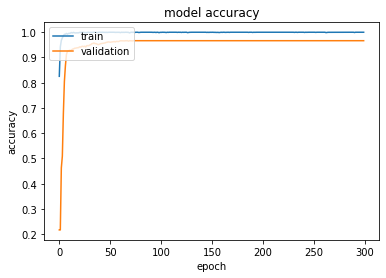

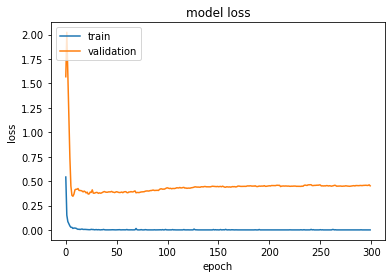

In [125]:
#TRAİNİNG.
model = model()
history = model.fit(X.values, Y.values, validation_split=0.50, epochs=300, batch_size=50, verbose=0)
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [127]:
print("Training accuracy: %.2f%% / Validation accuracy: %.2f%%" % 
      (100*history.history['accuracy'][-1], 100*history.history['val_accuracy'][-1]))

Training accuracy: 100.00% / Validation accuracy: 96.65%
